In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
csv = pd.read_csv('/content/innovize_final_ml.csv')

In [ ]:
csv.shape

(6000, 10)

In [ ]:
csv.head(20)

,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,Vegan,Sedentary,7,10,Artist,1.0,2020.0,1831.0,0
1,4.0,Vegan,Lightly Active,7,1,Teacher,0.0,5154.0,2190.0,0
2,8.0,Vegetarian,Active,8,10,Freelancer,1.0,12363.0,2297.0,1
3,2.0,Pescatarian,Sedentary,8,7,Doctor,0.0,1664.0,1943.0,0
4,9.0,Pescatarian,Highly Active,5,7,Business,0.0,17680.0,3527.0,1
5,2.0,Keto,Sedentary,8,9,Freelancer,1.0,4497.0,2103.0,0
6,1.0,Pescatarian,Sedentary,6,10,Business,1.0,1434.0,1784.0,0
7,2.0,Keto,Sedentary,7,5,Artist,0.0,2193.0,1702.0,0
8,5.0,Pescatarian,Lightly Active,9,6,Nurse,0.0,7268.0,2454.0,0
9,9.0,Pescatarian,Highly Active,8,2,Artist,1.0,16210.0,3631.0,1


In [ ]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phy_fitness         5997 non-null   float64
 1   diet_pref           5996 non-null   object 
 2   act_level           5994 non-null   object 
 3   sleep_hrs           6000 non-null   int64  
 4   mindfulness         6000 non-null   int64  
 5   career              5996 non-null   object 
 6   gender              5999 non-null   float64
 7   daily_avg_steps     5989 non-null   float64
 8   daily_avg_calories  5986 non-null   float64
 9   is_healthy          6000 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 468.9+ KB


In [ ]:
csv.isna().sum()

,0
phy_fitness,3
diet_pref,4
act_level,6
sleep_hrs,0
mindfulness,0
career,4
gender,1
daily_avg_steps,11
daily_avg_calories,14
is_healthy,0


In [ ]:
csv.dropna(inplace = True)

In [ ]:
csv.shape

(5964, 10)

In [ ]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5964 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phy_fitness         5964 non-null   float64
 1   diet_pref           5964 non-null   object 
 2   act_level           5964 non-null   object 
 3   sleep_hrs           5964 non-null   int64  
 4   mindfulness         5964 non-null   int64  
 5   career              5964 non-null   object 
 6   gender              5964 non-null   float64
 7   daily_avg_steps     5964 non-null   float64
 8   daily_avg_calories  5964 non-null   float64
 9   is_healthy          5964 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 512.5+ KB


In [ ]:
cat = ['diet_pref', 'act_level', 'career']
num = ['phy_fitness', 'sleep_hrs', 'mindfulness', 'gender', 'daily_avg_steps', 'daily_avg_calories']
target = csv['is_healthy']

In [ ]:
# 1 -> healthy
# 0 -> not healthy

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_data = encode.fit_transform(csv[cat])
feature_names = encode.get_feature_names_out(cat)
encoded_df = pd.DataFrame(encoded_data, columns = feature_names, index = csv.index)
csv = pd.concat([csv, encoded_df], axis = 1)
csv.drop(columns = cat, inplace = True)

In [ ]:
csv.head()

,phy_fitness,sleep_hrs,mindfulness,gender,daily_avg_steps,daily_avg_calories,is_healthy,diet_pref_Keto,diet_pref_Non-Vegetarian,diet_pref_Pescatarian,...,career_Artist,career_Business,career_Doctor,career_Engineer,career_Freelancer,career_Lawyer,career_Manager,career_Nurse,career_Scientist,career_Teacher
0,3.0,7,10,1.0,2020.0,1831.0,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,7,1,0.0,5154.0,2190.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,8.0,8,10,1.0,12363.0,2297.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2.0,8,7,0.0,1664.0,1943.0,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,5,7,0.0,17680.0,3527.0,1,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
csv[num] = scaler.fit_transform(csv[num])

In [ ]:
csv.head(10)

,phy_fitness,sleep_hrs,mindfulness,gender,daily_avg_steps,daily_avg_calories,is_healthy,diet_pref_Keto,diet_pref_Non-Vegetarian,diet_pref_Pescatarian,...,career_Artist,career_Business,career_Doctor,career_Engineer,career_Freelancer,career_Lawyer,career_Manager,career_Nurse,career_Scientist,career_Teacher
0,0.222222,0.50,1.000000,1.0,0.053634,0.122911,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.50,0.000000,0.0,0.218590,0.256220,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.777778,0.75,1.000000,1.0,0.598031,0.295952,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.111111,0.75,0.666667,0.0,0.034897,0.164501,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.888889,0.00,0.666667,0.0,0.877888,0.752692,1,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.111111,0.75,0.888889,1.0,0.184010,0.223914,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.25,1.000000,1.0,0.022791,0.105459,0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.111111,0.50,0.444444,0.0,0.062740,0.075009,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.444444,1.00,0.555556,0.0,0.329859,0.354252,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.888889,0.75,0.111111,1.0,0.800516,0.791311,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
target

,is_healthy
0,0
1,0
2,1
3,0
4,1
...,...
5995,1
5996,0
5997,0
5998,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(csv.drop(columns=['is_healthy']), csv['is_healthy'], test_size = 0.3, random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(4174, 1790, 4174, 1790)

In [ ]:
y_train.value_counts()

,count
is_healthy,
0,2813
1,1361


In [ ]:
y_test.value_counts()

,count
is_healthy,
0,1268
1,522


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.970391061452514

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4]
}

model = SVC()
grid_search = GridSearchCV(model, param_grid, cv = 10, scoring = 'accuracy', verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_model), print(best_params)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
SVC(C=100, degree=2, kernel='linear')
{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


(None, None)

In [ ]:
model2 = SVC(C = 100, degree = 2, kernel = 'linear')
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9983240223463687

We've reached an accuracy of 99.83%, which is the highest so far

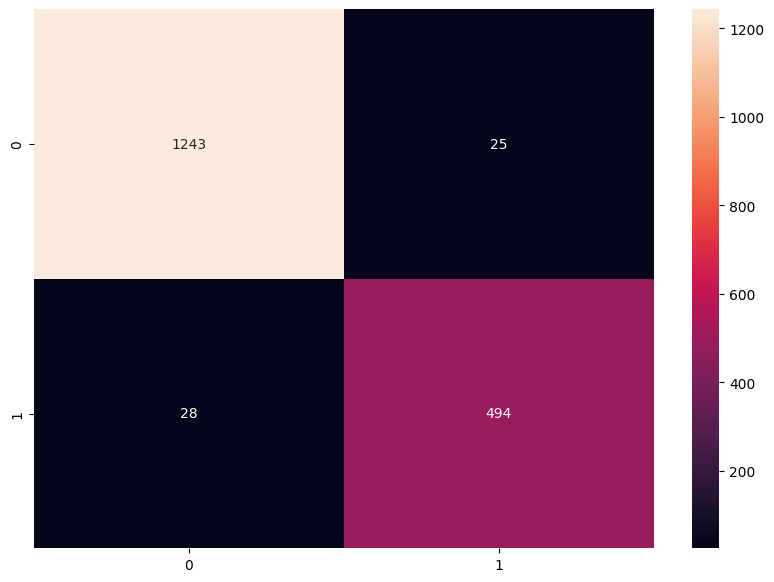

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cf, annot = True, fmt = 'd')
plt.show()

HENCE, FINAL ACCURACY `99.8324 %`

# Graph

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

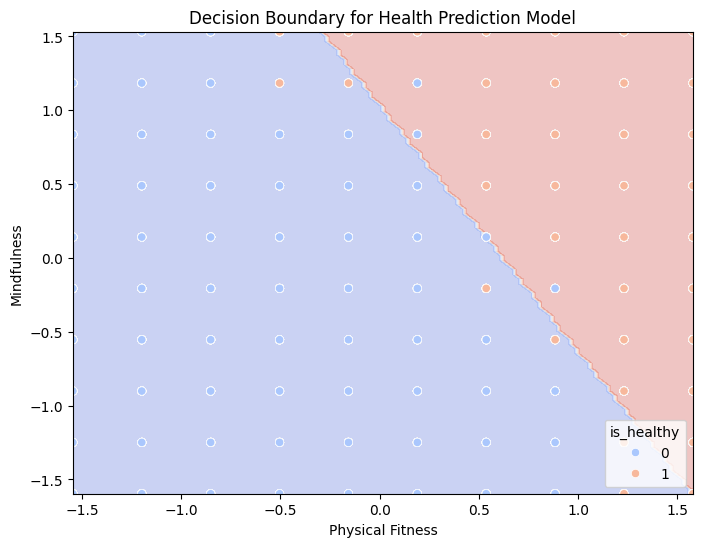

In [ ]:
from sklearn.preprocessing import StandardScaler

X = csv[['phy_fitness', 'mindfulness']]
y = csv['is_healthy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model10 = SVC(C = 100, degree = 2, kernel = 'linear')
model10.fit(X_train, y_train)

xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),  #creating a 2d grid for the decision boundary.
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))
Z = model10.predict(np.c_[xx.ravel(), yy.ravel()])   #predictong the values on the grid
Z = Z.reshape(xx.shape)

plt.figure(figsize= (8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap = 'coolwarm')
sns.scatterplot(x = X_train[:, 0], y = X_train[:, 1], hue = y_train, palette = 'coolwarm')
plt.xlabel("Physical Fitness")
plt.ylabel("Mindfulness")
plt.title("Decision Boundary for Health Prediction Model")
plt.show()